# kNN: k-nearest neighbor classifier 

Exmple of usage kNN library on the well-known Iris dataset.
Evaluation of the leave-one-out cross-validation for different setup of 'k' and 'p' parameters, 
where 'k' is the neigbors count and 'p' the Minkowski distance parameter.

Load libraries

In [11]:
using kNN
using MLDatasets, Random, DataFrames
using Plots, Printf

Load dataset

In [12]:
dataset = DataFrame(shuffle(eachrow(Iris().dataframe)))

,sepallength,sepalwidth,petallength,petalwidth,class
,Float64,Float64,Float64,Float64,String15
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,4.4,2.9,1.4,0.2,Iris-setosa
3,5.1,3.8,1.5,0.3,Iris-setosa
4,5.7,2.6,3.5,1.0,Iris-versicolor
5,7.6,3.0,6.6,2.1,Iris-virginica
6,7.4,2.8,6.1,1.9,Iris-virginica
7,6.4,3.1,5.5,1.8,Iris-virginica
8,6.5,3.0,5.5,1.8,Iris-virginica
9,6.1,2.8,4.7,1.2,Iris-versicolor


Prepare heatmap matrix of 'k' and 'p' parameters

In [13]:
k_linspace = 1:20
p_linspace = 1:0.05:5
heatmap_matrix = zeros(length(k_linspace), length(p_linspace));

Fill heatmap matrix with accuracy results for different parameters setting

In [14]:
for (k::Int64, k_itr::Int64) in zip(k_linspace, 1:length(k_linspace))
    for (p::Float64, p_itr::Int64) in zip(p_linspace, 1:length(p_linspace))
        heatmap_matrix[k_itr, p_itr] = leave_one_out_kNN(dataset, 1:4, 5, k, p)
    end
end

Plot the heatmap

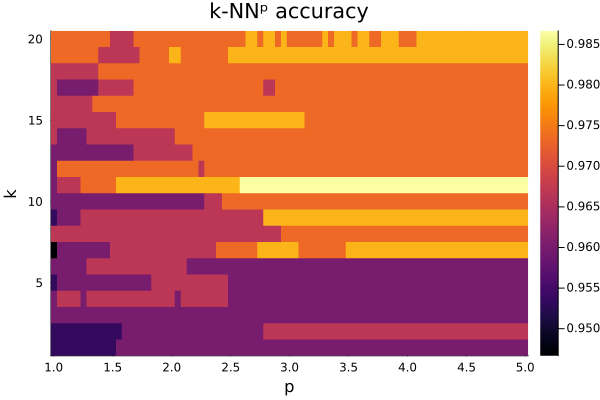

In [21]:
plot()
heatmap(heatmap_matrix, xticks = (1:10:length(p_linspace)+1, 
    string.(1:maximum(p_linspace)/10:maximum(p_linspace))), title="k-NNᵖ accuracy", xlabel="p", ylabel="k")

Get the minimum and the maximum accuracy settings

In [16]:
max_arg = argmax(heatmap_matrix)
min_arg = argmin(heatmap_matrix)
@printf "best accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[max_arg] max_arg[2] max_arg[1]
@printf "worst accuracy: %.3f for p = %.2f and k = %i\n" heatmap_matrix[min_arg] min_arg[2] min_arg[1]

best accuracy: 0.987 for p = 33.00 and k = 11
worst accuracy: 0.947 for p = 1.00 and k = 7
